In [4]:
import tensorflow as tf
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

11493376/11490434 [==============================] - 1s 0us/step


In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 19s 315us/step - loss: 0.3019 - acc: 0.9120
Epoch 2/5
60000/60000 [==============================] - 17s 286us/step - loss: 0.1474 - acc: 0.9564
Epoch 3/5
60000/60000 [==============================] - 13s 224us/step - loss: 0.1123 - acc: 0.9664
Epoch 4/5
60000/60000 [==============================] - 25s 415us/step - loss: 0.0894 - acc: 0.9724
Epoch 5/5
60000/60000 [==============================] - 21s 354us/step - loss: 0.0750 - acc: 0.9770


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.evaluate(test_images, test_labels, verbose=2)

[0.079906320598907774, 0.97499999999999998]

In [12]:
model.predict(test_images)

array([[  2.84335044e-08,   5.37898188e-08,   6.92035201e-06, ...,
          9.99693394e-01,   4.99930502e-06,   1.27283174e-05],
       [  2.29110938e-07,   2.63060938e-04,   9.98748779e-01, ...,
          8.38024515e-14,   2.00807381e-06,   2.52232024e-12],
       [  1.91967814e-07,   9.98936713e-01,   6.53599098e-04, ...,
          3.54225049e-04,   2.86537961e-05,   2.15994390e-07],
       ..., 
       [  1.55204381e-13,   4.72958828e-09,   4.04562581e-12, ...,
          1.14718866e-07,   2.83567283e-06,   1.01653804e-05],
       [  1.30780761e-10,   3.09118313e-08,   4.68106276e-10, ...,
          4.00643130e-10,   5.63255708e-05,   3.59937011e-11],
       [  1.04804663e-07,   1.18621530e-12,   4.88376131e-08, ...,
          4.92812345e-12,   4.28229585e-09,   6.82111923e-09]], dtype=float32)

In [13]:
model.save('mnist.h5')

In [14]:
new_model = tf.keras.models.load_model('mnist.h5')
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
p = model.predict(test_images)

In [16]:
print(p)

[[  2.84335044e-08   5.37898188e-08   6.92035201e-06 ...,   9.99693394e-01
    4.99930502e-06   1.27283174e-05]
 [  2.29110938e-07   2.63060938e-04   9.98748779e-01 ...,   8.38024515e-14
    2.00807381e-06   2.52232024e-12]
 [  1.91967814e-07   9.98936713e-01   6.53599098e-04 ...,   3.54225049e-04
    2.86537961e-05   2.15994390e-07]
 ..., 
 [  1.55204381e-13   4.72958828e-09   4.04562581e-12 ...,   1.14718866e-07
    2.83567283e-06   1.01653804e-05]
 [  1.30780761e-10   3.09118313e-08   4.68106276e-10 ...,   4.00643130e-10
    5.63255708e-05   3.59937011e-11]
 [  1.04804663e-07   1.18621530e-12   4.88376131e-08 ...,   4.92812345e-12
    4.28229585e-09   6.82111923e-09]]


In [17]:
print(p.shape, test_images.shape)

(10000, 10) (10000, 28, 28)


In [18]:
print(np.apply_along_axis(lambda arr: arr.argmax(), -1, p))

[7 2 1 ..., 4 5 6]


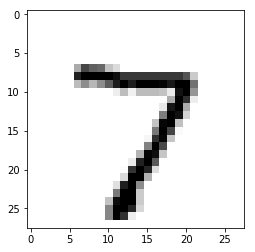

In [23]:
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.show()